* 任务一：从github上下载data.txt数据集，使用Pandas加载，在数据集上进行测试。
* 任务二：编写PCA方法，对数据进行降维操作，并进行可视化分析。

## 1、导入所需的库

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2、定义一个均值函数

In [2]:
# 计算均值要求输入数据为numpy的矩阵格式，行表示样本数,列表示特征
def meanX(dataX):
    return np.mean(dataX, axis=0)  # axis =0表示按照列来求均值,如果输入list,则axis= 1

## 3、编写PCA方法，具体解释参考注释

In [3]:
"""
参数:
    - XMat:传入的是一 个numpy的矩阵格式，行表示样本数，列表示特征
    - k:表示取前k个特征值对应的特征向量
返回值:
    - finalData:参数-指的是返回的低维矩阵，对应于输入参数二
    - reconData: 参数二对应的是移动坐标轴后的矩阵
"""


def pca(XMat, k):
    average = meanX(XMat)
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T)  # 计算协方差矩阵
    featValue, featVec = np.linalg.eig(covX)  # 求解协方差矩阵的特征值和特征向量
    index = np.argsort(-featValue)  # 按照featValuei进行从大到小排序
    finalData = []
    if k > n:
        print("k must lower than feature number")
        return
    else:
        # 注意特征向量时列向量，而numpy的维矩阵(数组)a[m][n]中， a[1]表示第 1行值
        selectVec = np.matrix(featVec.T[index[:k]])  # 所以这里需要进行转置
        finalData = data_adjust * selectVec.T
        reconData = (finalData * selectVec) + average
    return finalData, reconData

## 4、编写一个加载数据集的函数

In [4]:
# 输入文件的每行数据都以\t隔开
def loaddata(datafile):
    return np.array(pd.read_csv(datafile, sep="\t", header=None)).astype(np.float64)

## 5、可视化结果

In [5]:
# 因为将维数k指定为2，所以可以使用下面的函数将其绘制出来：
def plotBestFit(data1, data2):
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)

    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i, 0])
        axis_y1.append(dataArr1[i, 1])
        axis_x2.append(dataArr2[i, 0])
        axis_y2.append(dataArr2[i, 1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=50, c="red", marker="s")
    ax.scatter(axis_x2, axis_y2, s=50, c="blue")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.savefig("./data/outfile.png")
    plt.show()

## 6、测试方法

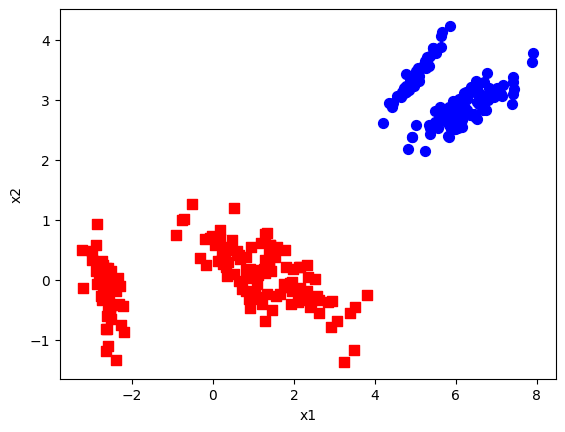

In [6]:
# 根据数据集data.txt
def main():
    datafile = "./data/data.txt"
    XMat = loaddata(datafile)
    k = 2
    return pca(XMat, k)


# if __name__ =="_main_":
# 主函数
finalData, reconMat = main()
plotBestFit(finalData, reconMat)